About the data:


* drink_name: Name of the drink
* type: Type of drink, categories defined by Starbucks
* size: Size of the drink
* calories: Number of calories
* fat: Total fat (g)
* cholesterol: Cholesterol (mg)
* sodium: Sodium (mg)
* carb: Total carbohydrates (g)
* sugar: Sugars (g)
* protein: Protein (g)
* caffeine: Caffeine (g)

According to the American Heart Association (AHA), the maximum amount of added sugars you should eat in a day are (7 Trusted Source):

* Men: 150 calories per day (37.5 grams or 9 teaspoons)
* Women: 100 calories per day (25 grams or 6 teaspoons)
    
## My Questions:
    
1. What Starbucks drinks contain less than 25 grams of sugar?
1. What Starbucks drinks contain less than 100 calories?
1. What Starbucks drinks contain less than 400mg of caffeine?
2. Is my favorite drink in the top unheathy (high calories, sugar, caffeine) Starbucks drinks?


## 1. Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Loading Starbucks drink nutrition dataset

In [2]:
#df = pd.read_csv("starbucks-menu-nutrition-drinks.csv")
df = pd.read_csv('sbux_nutrition.csv')

In [3]:
df.head(10)

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
0,Caffè Americano,Hot Coffees,Short,5.0,0.0,0.0,5.0,1.0,0.0,0.0,75.0
1,Caffè Americano,Hot Coffees,Tall,10.0,0.0,0.0,10.0,1.0,0.0,1.0,150.0
2,Caffè Americano,Hot Coffees,Grande,15.0,0.0,0.0,10.0,2.0,0.0,1.0,225.0
3,Caffè Americano,Hot Coffees,Venti,15.0,0.0,0.0,15.0,3.0,0.0,1.0,300.0
4,Blonde Roast,Hot Coffees,Short,5.0,0.0,0.0,5.0,0.0,0.0,0.0,180.0
5,Blonde Roast,Hot Coffees,Tall,5.0,0.0,0.0,10.0,0.0,0.0,0.0,270.0
6,Blonde Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,360.0
7,Blonde Roast,Hot Coffees,Venti,5.0,0.0,0.0,10.0,0.0,0.0,1.0,475.0
8,Caffè Misto,Hot Coffees,Short,50.0,2.0,10.0,50.0,5.0,5.0,4.0,75.0
9,Caffè Misto,Hot Coffees,Tall,80.0,3.0,15.0,80.0,8.0,8.0,5.0,115.0


In [4]:
# Size of drink
print(f"There are {len(df['size'].unique())} drink sizes at Starbuck")
df['size'].unique()

There are 13 drink sizes at Starbuck


array(['Short', 'Tall', 'Grande', 'Venti', 'Solo', 'Doppio', 'Triple',
       'Quad', 'Kids', 'Trenta', '12 fl oz', '11 fl oz', '8 fl oz'],
      dtype=object)

<img src="Starbuck drink size.jpeg" width=560 height=360 />

In [5]:
# Check any null value
df.isnull().sum()

drink_name     0
type           0
size           0
calories       8
fat            8
cholesterol    8
sodium         8
carb           8
sugar          8
protein        8
caffeine       8
dtype: int64

In [6]:
df.shape

(525, 11)

There is 525 rows and 11 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drink_name   525 non-null    object 
 1   type         525 non-null    object 
 2   size         525 non-null    object 
 3   calories     517 non-null    float64
 4   fat          517 non-null    float64
 5   cholesterol  517 non-null    float64
 6   sodium       517 non-null    float64
 7   carb         517 non-null    float64
 8   sugar        517 non-null    float64
 9   protein      517 non-null    float64
 10  caffeine     517 non-null    float64
dtypes: float64(8), object(3)
memory usage: 45.2+ KB


In [8]:
df.describe()

,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,187.369439,5.998066,17.214700,105.473888,29.127660,26.506770,4.328820,102.379110
std,143.849839,6.526852,20.596209,106.221292,21.473328,20.112341,4.744254,93.012395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,15.000000,11.000000,11.000000,0.000000,30.000000
50%,170.000000,4.000000,5.000000,80.000000,27.000000,25.000000,2.000000,75.000000
75%,280.000000,11.000000,35.000000,160.000000,43.000000,39.000000,7.000000,150.000000
max,590.000000,27.000000,75.000000,490.000000,97.000000,88.000000,19.000000,475.000000


## 3. Cleaning the data

### 3.1 Filtering null value, and pick one size only ( Grande 16 oz - average size)

In [9]:
# Drop rows has null values
df = df.dropna()
df.shape

(517, 11)

In [10]:
df.isnull().sum()

drink_name     0
type           0
size           0
calories       0
fat            0
cholesterol    0
sodium         0
carb           0
sugar          0
protein        0
caffeine       0
dtype: int64

In [11]:
# Filter Grande drink ( easy to compare all drinks when they have the same size)
df = df[df['size'] == 'Grande']
print(f"There are {df.shape[0]} Grande drinks at Starbucks")
df.head()

There are 139 Grande drinks at Starbucks


,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
2,Caffè Americano,Hot Coffees,Grande,15.0,0.0,0.0,10.0,2.0,0.0,1.0,225.0
6,Blonde Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,360.0
10,Caffè Misto,Hot Coffees,Grande,110.0,4.0,15.0,100.0,10.0,10.0,7.0,150.0
14,Featured Starbucks® Dark Roast Coffee,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,260.0
18,Pike Place® Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,310.0


In [12]:
df.describe()

,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,200.575540,6.863309,19.712230,117.050360,30.035971,27.129496,4.697842,108.323741
std,141.833336,6.804412,21.717636,104.293366,19.873298,18.661296,4.692971,86.717784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,0.000000,0.000000,15.000000,14.000000,11.500000,1.000000,32.500000
50%,190.000000,4.500000,15.000000,110.000000,30.000000,26.000000,3.000000,95.000000
75%,335.000000,14.000000,45.000000,190.000000,44.000000,41.500000,8.000000,170.000000
max,470.000000,24.000000,65.000000,380.000000,77.000000,71.000000,15.000000,360.000000


## Relationships 

In [13]:
# The average value of each nutrient for each type of drinks
type_avg = df.groupby('type').mean()
type_avg

,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
type,,,,,,,,
Cold Coffees,159.500000,6.362500,18.000000,96.125000,21.025000,18.650000,4.275000,194.000000
Cold Drinks,129.411765,1.382353,0.000000,49.117647,28.352941,25.117647,0.588235,36.470588
Frappuccino® Blended Beverages,385.714286,15.642857,45.714286,263.809524,56.428571,51.047619,5.238095,60.238095
Hot Coffees,220.200000,8.240000,22.600000,137.400000,28.440000,24.800000,8.240000,174.600000
Hot Drinks,350.000000,12.000000,40.555556,180.000000,50.222222,47.222222,10.777778,5.555556
Hot Teas,72.307692,1.500000,5.769231,38.076923,12.384615,11.846154,2.615385,37.461538
Iced Teas,114.642857,1.000000,3.928571,35.714286,24.500000,23.357143,1.785714,36.428571


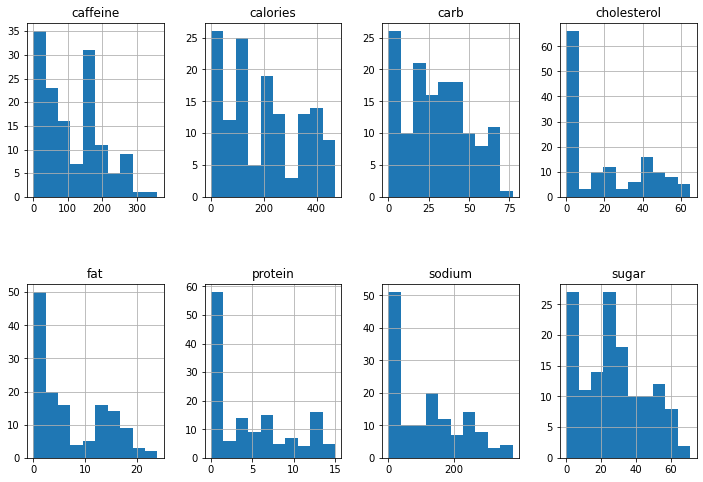

In [39]:
# Plot the distribution for all features =, and number of drinks ( 139 drinks with Grande size)
df.hist(layout=(2,4), figsize=(12,8))      
plt.subplots_adjust(hspace = 0.5);

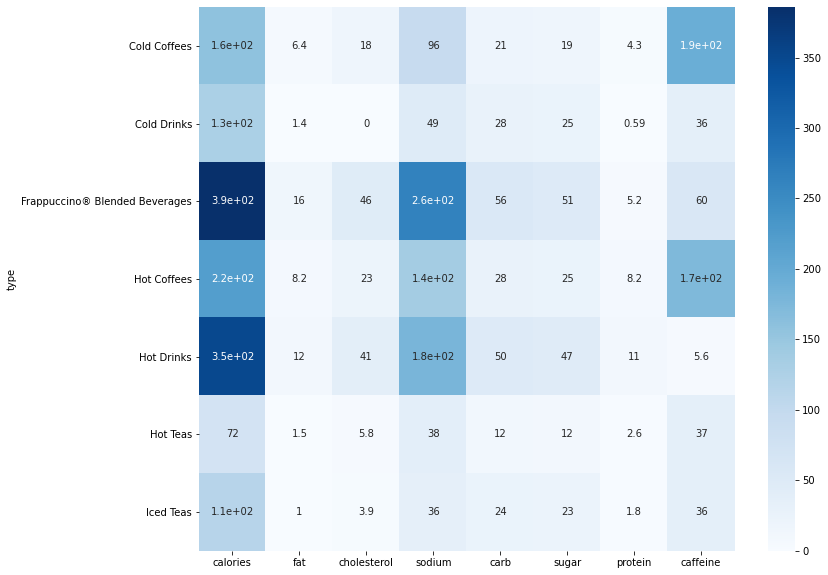

In [15]:
# Correlation between type of drink and its nutrient
plt.figure(figsize=(12,10))
sns.heatmap(type_avg, cmap='Blues', annot=True)


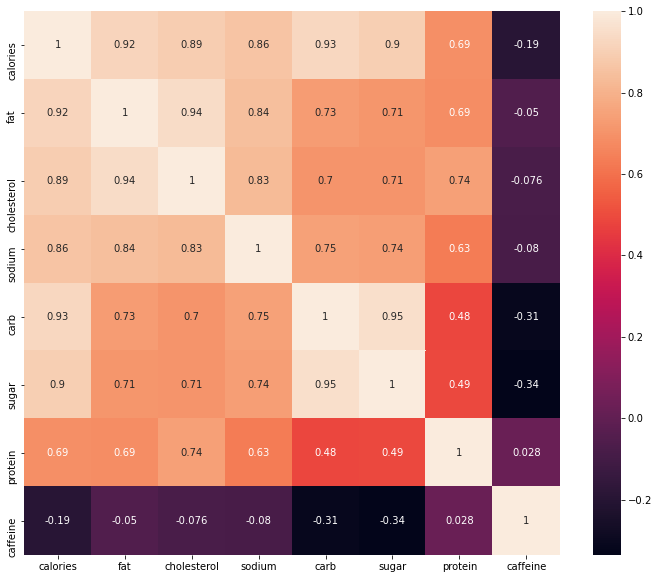

In [16]:
# Show a seaborn heatmap of correlations in starbucks nutrient
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True);

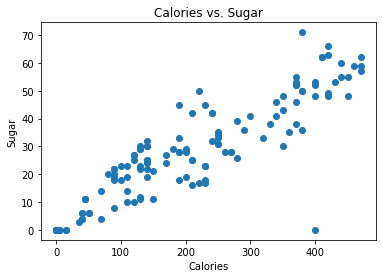

In [17]:
# Calories, sugar and carb has high correlation with each other

plt.scatter(data=df, x='calories', y='sugar')
plt.xlabel('Calories')
plt.ylabel('Sugar')
plt.title('Calories vs. Sugar');



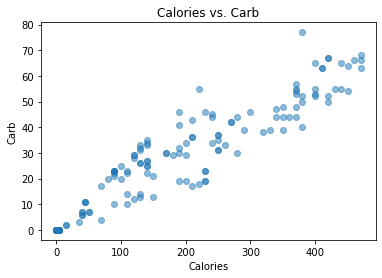

In [18]:
plt.scatter(data=df, x='calories', y='carb', alpha=1/2)
plt.xlabel('Calories')
plt.ylabel('Carb')
plt.title('Calories vs. Carb');

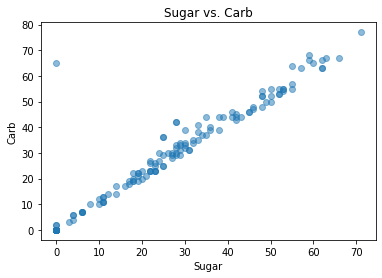

In [19]:
plt.scatter(data=df, x='sugar', y='carb', alpha=1/2)
plt.xlabel('Sugar')
plt.ylabel('Carb')
plt.title('Sugar vs. Carb');

Sugar and Carb has linear correlated with each other

# 4.  Visualize nutrients in Starbucks drinks 

In [20]:
calories = df.sort_values(by='calories', ascending=False)
carb = df.sort_values(by='carb', ascending=False)
sugar = df.sort_values(by='sugar', ascending=False)
caffeine = df.sort_values(by='caffeine', ascending=False)

In [36]:
caffeine.head(10)

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
6,Blonde Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,360.0
18,Pike Place® Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,310.0
313,Starbucks Reserve® Nitro Cold Brew,Cold Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,0.0,280.0
309,Nitro Cold Brew with Dark Cocoa Almondmilk Foam,Cold Coffees,Grande,40.0,1.5,0.0,35.0,6.0,4.0,1.0,280.0
317,Nitro Cold Brew,Cold Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,0.0,280.0
307,Nitro Cold Brew with Cinnamon Almondmilk Foam,Cold Coffees,Grande,40.0,1.0,0.0,35.0,7.0,6.0,1.0,275.0
311,Nitro Cold Brew with Cinnamon Oatmilk Foam,Cold Coffees,Grande,50.0,1.5,0.0,30.0,7.0,6.0,1.0,275.0
315,Salted Caramel Cream Nitro Cold Brew,Cold Coffees,Grande,230.0,14.0,45.0,330.0,23.0,23.0,2.0,270.0
305,Pumpkin Cream Nitro Cold Brew,Cold Coffees,Grande,250.0,12.0,40.0,55.0,31.0,31.0,3.0,265.0
319,Nitro Cold Brew with Sweet Cream,Cold Coffees,Grande,70.0,5.0,15.0,20.0,4.0,4.0,1.0,265.0


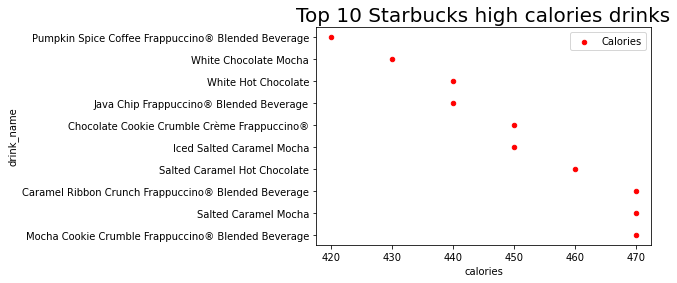

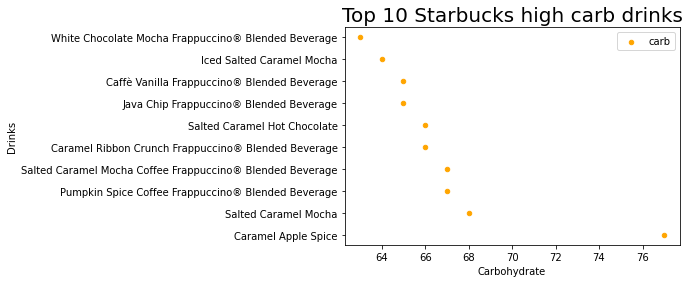

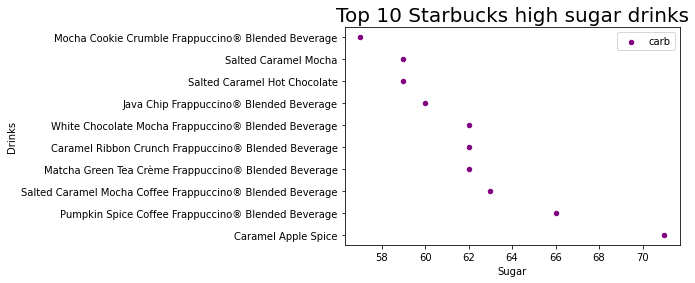

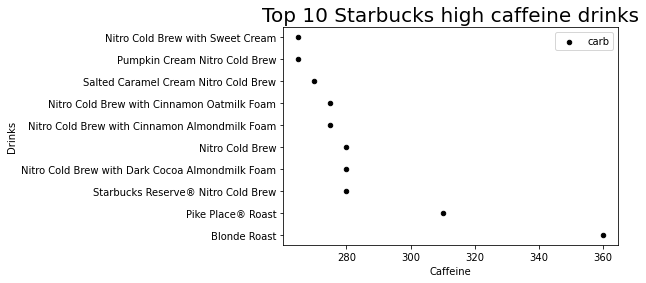

In [37]:

# Calories
top_10_high_calories = calories.head(10)

top_10_high_calories.plot(kind = 'scatter', x = 'calories', y = 'drink_name', 
                        color='red', label='Calories')
plt.xlabel('calories')
plt.ylabel('drink_name')
plt.title('Top 10 Starbucks high calories drinks', size=20)
plt.show();

# Carb
top_10_high_carb = carb.head(10)
top_10_high_carb.plot(kind = 'scatter', x = 'carb', y = 'drink_name', 
                        color='orange', label='carb')
plt.xlabel('Carbohydrate')
plt.ylabel('Drinks')
plt.title('Top 10 Starbucks high carb drinks', size=20)
plt.show();

# Sugar
top_10_high_sugar = sugar.head(10)
top_10_high_sugar.plot(kind = 'scatter', x = 'sugar', y = 'drink_name', 
                        color='purple', label='carb')
plt.xlabel('Sugar')
plt.ylabel('Drinks')
plt.title('Top 10 Starbucks high sugar drinks', size=20)
plt.show();

# Caffeine
top_10_high_caffeine = caffeine.head(10)
top_10_high_caffeine.plot(kind = 'scatter', x = 'caffeine', y = 'drink_name', 
                        color='black', label='carb')
plt.xlabel('Caffeine')
plt.ylabel('Drinks')
plt.title('Top 10 Starbucks high caffeine drinks', size=20)
plt.show();

In [26]:
'''
"The AHA suggests an added-sugar limit of no more than 100 'CALORIES' per day = 24 grams of 'SUGAR' for most women 
                    and no more than 150 calories per day (about 9 teaspoons or 36 grams of sugar) for most men"
Caffeine: Up to 400 milligrams (mg) of caffeine a day appears to be safe for most healthy adults
'''
below_100_calories = df[df['calories'] < 100].sort_values(by='calories')
below_24_sugar = df[df['sugar'] < 25].sort_values(by='sugar')
below_400_caffeine = df[df['caffeine'] < 400].sort_values(by='caffeine')

print(f"There are {below_100_calories.shape[0]} Starbucks drinks that contains less than 100 Calories") 
print(f"There are {below_24_sugar.shape[0]} Starbucks drinks that contains less than 24 grams of Sugar") 
print(f"There are {below_400_caffeine.shape[0]} Starbucks drinks that contains less than 400 miligrams of Caffeine") 

There are 38 Starbucks drinks that contains less than 100 Calories
There are 64 Starbucks drinks that contains less than 24 grams of Sugar
There are 139 Starbucks drinks that contains less than 400 miligrams of Caffeine


### Heathier-r-r-r Drinks

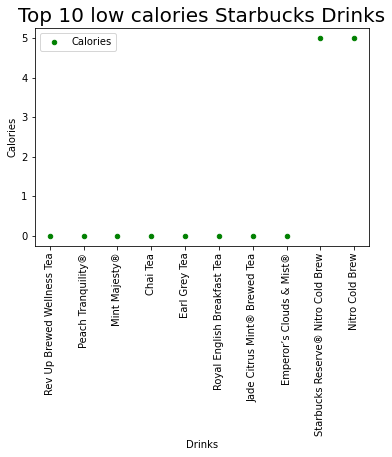

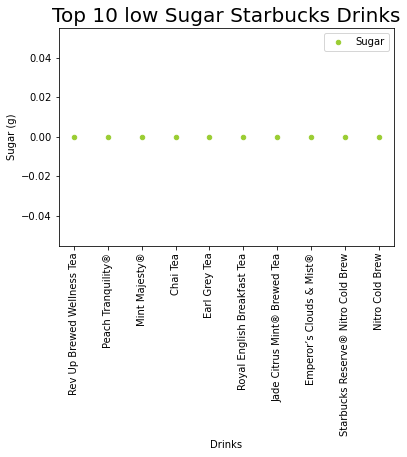

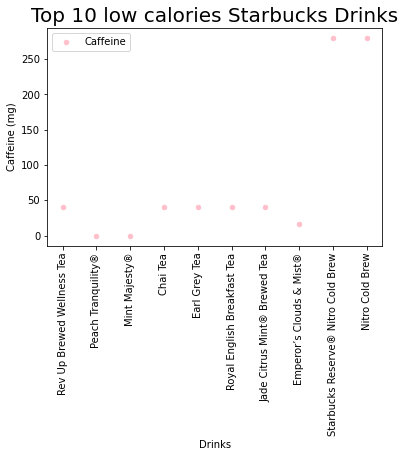

In [32]:
# Plot low calories drinks
below_100_calories.head(10).plot(kind = 'scatter', x = 'drink_name', y = 'calories', 
                        color='green', label='Calories', rot=90)
plt.xlabel('Drinks')
plt.ylabel('Calories')
plt.title('Top 10 low calories Starbucks Drinks', size=20)
plt.show();
    
    
# Low Sugar drinks
below_100_calories.head(10).plot(kind = 'scatter', x = 'drink_name', y = 'sugar', 
                        color='yellowgreen', label='Sugar', rot=90)
plt.xlabel('Drinks')
plt.ylabel('Sugar (g)')
plt.title('Top 10 low Sugar Starbucks Drinks', size=20)
plt.show();
    
# Low/Non Caffeine drinks
below_100_calories.head(10).plot(kind = 'scatter', x = 'drink_name', y = 'caffeine', 
                        color='pink', label='Caffeine', rot=90)
plt.xlabel('Drinks')
plt.ylabel('Caffeine (mg)')
plt.title('Top 10 low calories Starbucks Drinks', size=20)
plt.show();

## 5. Matcha story

My favorite drink at Starbucks is Matcha Crème Frappuccino and Green tea Latte. 
I used to drink at least twice a week. I am curious my drinks nutrient compare to the rest of starbuck nutrient.

In [34]:
df[df['drink_name'].str.contains('Matcha')]

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
146,Matcha Green Tea Latte,Hot Teas,Grande,240.0,7.0,25.0,160.0,34.0,32.0,12.0,80.0
261,Matcha Green Tea Crème Frappuccino® Blended Be...,Frappuccino® Blended Beverages,Grande,410.0,15.0,50.0,240.0,63.0,62.0,6.0,70.0
431,Iced Matcha Green Tea Latte,Iced Teas,Grande,200.0,5.0,20.0,120.0,29.0,28.0,9.0,80.0
442,Matcha Lemonade,Iced Teas,Grande,120.0,0.0,0.0,10.0,29.0,27.0,1.0,80.0
456,Iced Pineapple Matcha Drink,Cold Drinks,Grande,170.0,5.0,0.0,115.0,30.0,27.0,2.0,80.0


Both of my favorite drinks are high calories, sugar, carb and caffeine. Especially the `Matcha Green Tea Crème Frappuccino` appears in top 4 highest sugar out of all Starbucks drink.
